## Import libraries required for analysis

In [212]:
# NBVAL_IGNORE_OUTPUT
# ^this is a magic comment to work around this issue https://github.com/ebmdatalab/custom-docker/issues/10
from change_detection import functions as chg
from lib.outliers import *  #This is copied into the local folder from a branch ebmdatalab pandas library - it will be placed in its own repo to install at a later dat

## Run change detection for the 3 OpenPrescribing opioid measures
- looks for changes in time-series data
- as described in https://www.bmj.com/content/367/bmj.l5205

In [213]:
# NBVAL_IGNORE_OUTPUT
# ^this is a magic comment to work around this issue https://github.com/ebmdatalab/custom-docker/issues/10
opioids_class = chg.ChangeDetection('ccg_data_opioid%',
                                    measure=True,
                                    direction='down',
                                    use_cache=True,
                                    overwrite=False,
                                    verbose=False,
                                    draw_figures='no')
opioids_class.run()

Using cached data


## Import results of change detection

In [214]:
opioids = opioids_class.concatenate_outputs()
opioids.head()

is.nbreak  is.tfirst  is.tfirst.pknown  \
measure            name                                           
ccg_data_opioidome 00C   0         NaN        NaN                 
                   00D   0         NaN        NaN                 
                   00J   0         NaN        NaN                 
                   00K   0         NaN        NaN                 
                   00L   0         NaN        NaN                 

                         is.tfirst.pknown.offs  is.tfirst.offs  is.tfirst.big  \
measure            name                                                         
ccg_data_opioidome 00C  NaN                    NaN             NaN              
                   00D  NaN                    NaN             NaN              
                   00J  NaN                    NaN             NaN              
                   00K  NaN                    NaN             NaN              
                   00L  NaN                    NaN             NaN              

                         is.slope.ma  is.slope.ma.prop  is.slope.ma.prop.lev  \
measure            name                                                        
ccg_data_opioidome 00C  NaN          NaN               NaN                     
                   00D  NaN          NaN               NaN                     
                   00J  NaN          NaN               NaN                     
                   00K  NaN          NaN               NaN                     
                   00L  NaN          NaN               NaN                     

                         is.intlev.initlev  is.intlev.finallev  \
measure            name                                          
ccg_data_opioidome 00C  NaN                NaN                   
                   00D  NaN                NaN                   
                   00J  NaN                NaN                   
                   00K  NaN                NaN                   
                   00L  NaN                NaN                   

                         is.intlev.levd  is.intlev.levdprop  
measure            name                                      
ccg_data_opioidome 00C  NaN             NaN                  
                   00D  NaN             NaN                  
                   00J  NaN             NaN                  
                   00K  NaN             NaN                  
                   00L  NaN             NaN

# Results
These are filtered:
- to only include CCGs that started within the highest 20% of all CCGs
- to remove any CCGs that have a short sudden spike that would lead the change detection algorithm to detect a sudden drop

and then sorted according to the largest total measured drop.

## Total Oral Morphine Equivalence
https://openprescribing.net/measure/opioidome

In [215]:
OME_table, all_OME_changes  = filtered_sparkline(opioids,
                   'ccg_data_opioid/ccg_data_opioidome',
                   'ccg_data_opioidome')

,Month when change detected,Measured proportional change,plots
link,,,
NHS VALE ROYAL CCG,2015-11-01,0.305159,
NHS GREAT YARMOUTH AND WAVENEY CCG,2017-02-01,0.263200,
"NHS HEYWOOD, MIDDLETON AND ROCHDALE CCG",2017-08-01,0.256618,
NHS HASTINGS AND ROTHER CCG,2017-06-01,0.244477,
"NHS EASTBOURNE, HAILSHAM AND SEAFORD CCG",2016-11-01,0.228806,
NHS NORTH TYNESIDE CCG,2018-02-01,0.189380,
NHS SOUTH TYNESIDE CCG,2017-05-01,0.187240,
NHS DONCASTER CCG,2017-02-01,0.160030,
NHS BOLTON CCG,2017-02-01,0.149190,

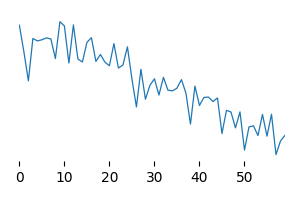
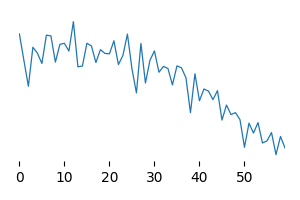
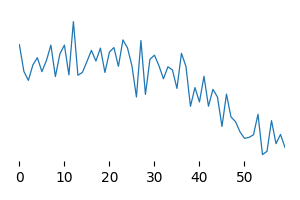
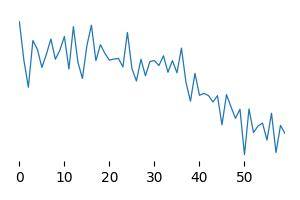
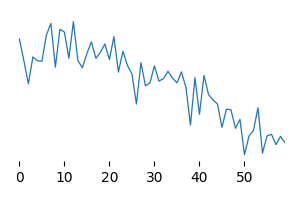
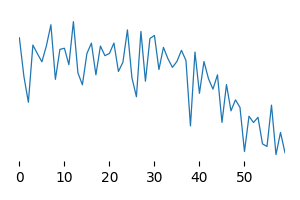
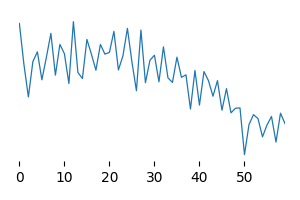
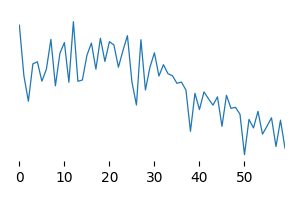
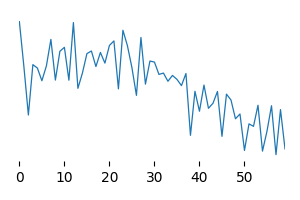
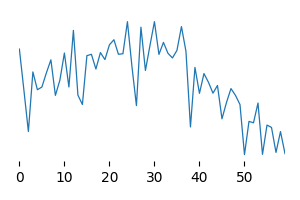

In [216]:
OME_table

## High dose opioids as percentage regular opioids

https://openprescribing.net/measure/opioidspercent

In [217]:
highperc_table, all_highperc_changes = filtered_sparkline(opioids,
                   'ccg_data_opioid/ccg_data_opioidspercent',
                   'ccg_data_opioidspercent')


,Month when change detected,Measured proportional change,plots
link,,,
NHS NORTH TYNESIDE CCG,2018-09-01,0.401453,
NHS GREAT YARMOUTH AND WAVENEY CCG,2018-05-01,0.332307,
"NHS HEYWOOD, MIDDLETON AND ROCHDALE CCG",2018-09-01,0.326709,
NHS SOUTH WEST LINCOLNSHIRE CCG,2015-08-01,0.259783,
NHS SOUTHEND CCG,2018-09-01,0.255134,
NHS WIGAN BOROUGH CCG,2018-11-01,0.209128,
NHS SOUTH TEES CCG,2015-07-01,0.193872,
NHS BRADFORD DISTRICTS CCG,2016-10-01,0.182914,
NHS WYRE FOREST CCG,2018-05-01,0.178563,

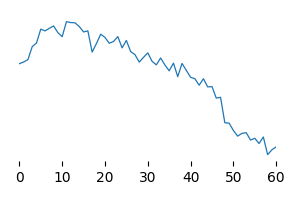
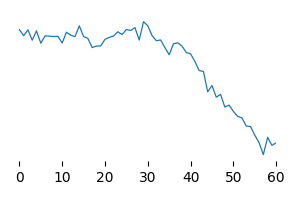
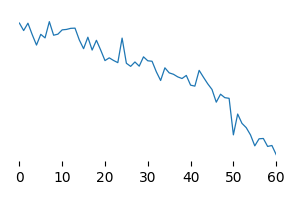
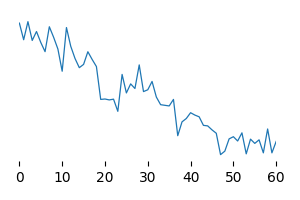
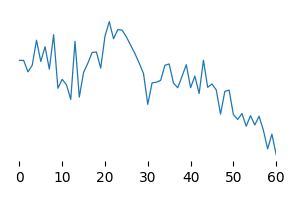
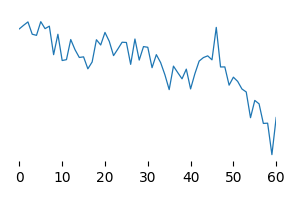
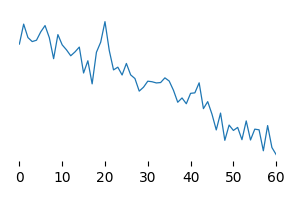
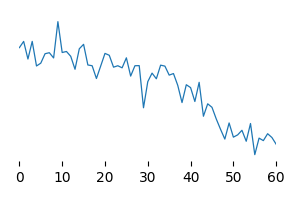
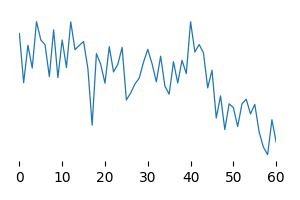
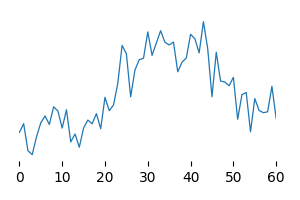

In [218]:
highperc_table

## High dose opioids per 1000 patients

https://openprescribing.net/measure/opioidper1000

In [219]:
high1000_table, all_high1000_changes = filtered_sparkline(opioids,
                   'ccg_data_opioid/ccg_data_opioidper1000',
                   'ccg_data_opioidper1000')

,Month when change detected,Measured proportional change,plots
link,,,
NHS GREAT YARMOUTH AND WAVENEY CCG,2017-08-01,0.392430,
NHS HASTINGS AND ROTHER CCG,2018-02-01,0.388705,
"NHS HEYWOOD, MIDDLETON AND ROCHDALE CCG",2017-08-01,0.380987,
NHS SOUTH TYNESIDE CCG,2016-11-01,0.369762,
NHS SALFORD CCG,2017-07-01,0.360949,
NHS NORTH TYNESIDE CCG,2018-03-01,0.358933,
NHS DARLINGTON CCG,2017-10-01,0.221148,
NHS SOUTH WEST LINCOLNSHIRE CCG,2016-05-01,0.217694,
NHS NORTH KIRKLEES CCG,2015-11-01,0.166284,

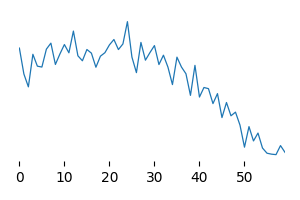
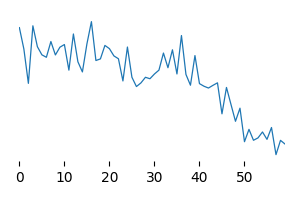
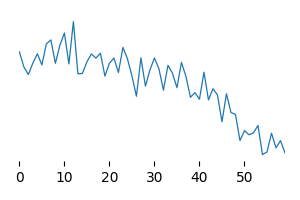
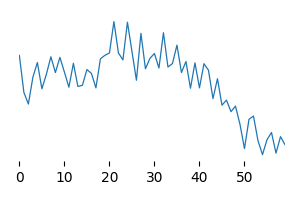
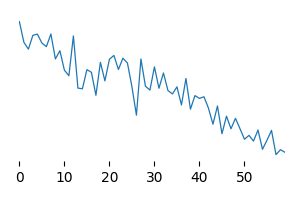
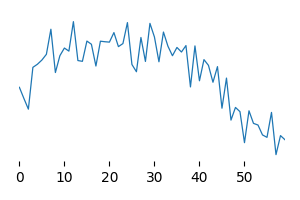
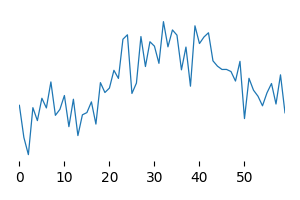
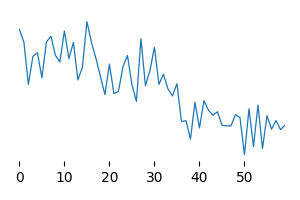
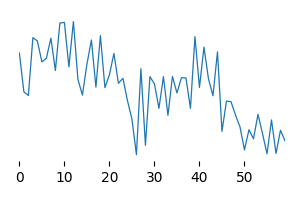
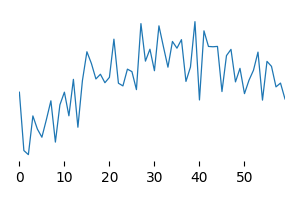

In [220]:
high1000_table

## Summary statistics

Summary statistics shown for all CCGs demonstrating a decrease.

In [221]:
all_OME_changes["measure"] = "Total oral morphine equivalence"
all_highperc_changes["measure"] = "High dose opioids as percentage regular opioids"
all_high1000_changes["measure"] = "High dose opioids per 1000 patients"

all_changes = all_OME_changes.append(all_highperc_changes).append(all_high1000_changes)
all_changes = all_changes[~all_changes.isin([np.nan, np.inf, -np.inf]).any(1)]
all_decreases = all_changes[all_changes['is.intlev.levdprop']>0]

CCG_decreases_summary = all_decreases.groupby("measure")["is.intlev.levdprop"].describe()
CCG_decreases_summary['IQR'] = CCG_decreases_summary['75%'] - CCG_decreases_summary['25%']
CCG_decreases_summary.rename( columns={'50%' : 'median'}, inplace=True)

CCG_decreases_summary_tosave = CCG_decreases_summary[['count', 'median','IQR','min', 'max']]
CCG_decreases_summary_tosave['median'] = (100 * CCG_decreases_summary_tosave['median']).round(1)
CCG_decreases_summary_tosave['IQR'] = (100 * CCG_decreases_summary_tosave['IQR']).round(1)
CCG_decreases_summary_tosave['min'] = (100 * CCG_decreases_summary_tosave['min']).round(1)
CCG_decreases_summary_tosave['max'] = (100 * CCG_decreases_summary_tosave['max']).round(1)
CCG_decreases_summary_tosave

<ipython-input-221-32a4274c54f2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCG_decreases_summary_tosave['median'] = (100 * CCG_decreases_summary_tosave['median']).round(1)
<ipython-input-221-32a4274c54f2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCG_decreases_summary_tosave['IQR'] = (100 * CCG_decreases_summary_tosave['IQR']).round(1)
<ipython-input-221-32a4274c54f2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,count,median,IQR,min,max
measure,,,,,
High dose opioids as percentage regular opioids,168.0,19.0,12.0,3.6,41.5
High dose opioids per 1000 patients,115.0,22.2,12.8,1.0,45.4
Total oral morphine equivalence,94.0,15.1,6.9,9.0,32.8
